In [18]:
# ! pip install nltk

In [49]:
# ! jupyter nbextension enable --py widgetsnbextension
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk



* VADER (Valence Aware Dictionary and sEntiment Reasoner)
* RoBERTa (Robustly Optimized BERT):
* Hugging Face Pipeline
* Logistic Regression

In [20]:
import pandas as pd


In [21]:

# import and read the data
df = pd.read_csv("C:\\Users\\14257\\OneDrive\\Desktop\\Github Projects\\NLP projects\\archive (8)\\Reviews.csv")

In [22]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
# Check the data shape
df.shape

(568454, 10)

In [24]:
# Randomly sample 1/100 of the data
data = df.sample(frac=0.01, random_state=42)
data.shape

(5685, 10)

Text(0.5, 0, 'Review Stars')

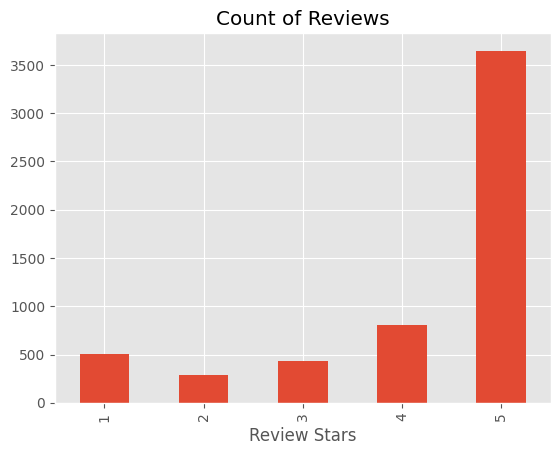

In [25]:
ax= data['Score'].value_counts().sort_index()\
.plot(kind='bar', title="Count of Reviews", fig=(10,5))
ax.set_xlabel('Review Stars')


### NLTK 

### 1. Sentiment Aanlysis using VADER (Valence Aware Dictionary and sEntiment Reasoner)

* This approach automatically tokenizes text into words, punctuation marks, emoticons, and special symbols.
* VADER accepts raw text, perfoms tokenization in the background and computes positive,negative, neatral and compound scores for each token.
* This approach does not account for relationship between words. It essentially looks at each word and scores it individually. This is a challenge because, naturally, human language do not work like that.


In [26]:
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # Progress tracker 

In [27]:
sia = SentimentIntensityAnalyzer() # Initialize the sentiment analyzer

In [28]:
# VADER scoring Example
sia.polarity_scores('I am so Happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

* The text has no negative sentiment.
* 33.4% of the text conveys a neutral tone
* 66.6% of the text conveys a positive sentiment

In [29]:
sia.polarity_scores('This product is bad')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

* The text has no positive sentiment.
* 46.2% of the text conveys a neutral tone
* 53.8% of the text conveys a positive sentiment

In [37]:
# Running VADER polarity score on the text column of the dataset
results = {}
for i, row in data.iterrows():
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)


In [38]:
# change the vaders scores into a dataframe
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
# Merge the scores to the original dataset 
vaders = vaders.merge(data,how='left')

In [39]:
# Original dataset with VADERS score for each column
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,165257,0.000,0.768,0.232,0.9684,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,0.089,0.766,0.144,0.7920,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,0.000,0.880,0.120,0.4588,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,0.009,0.827,0.163,0.9923,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,0.089,0.719,0.191,0.9421,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


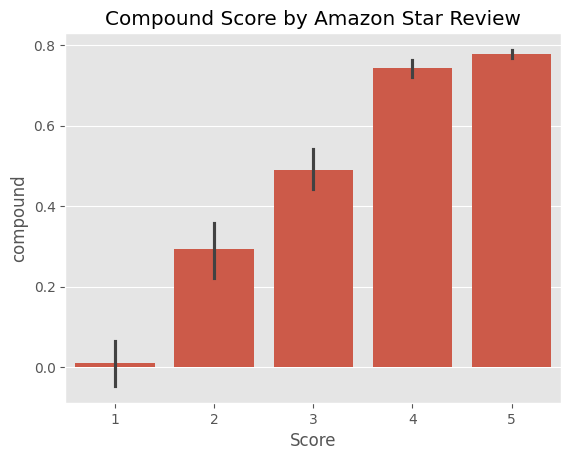

In [40]:
# Compare the VADER compound results to the amazon star reviews score
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

* As the Amazon star review score increases, the compound score also increases. This indicates that higher star reviews tend to have more positive sentiments based on VADER analysis
* 4 Stars and 5 Stars show the highest compound scores, indicating very positive sentiment. The 5-star reviews, in particular, have the highest positivity.

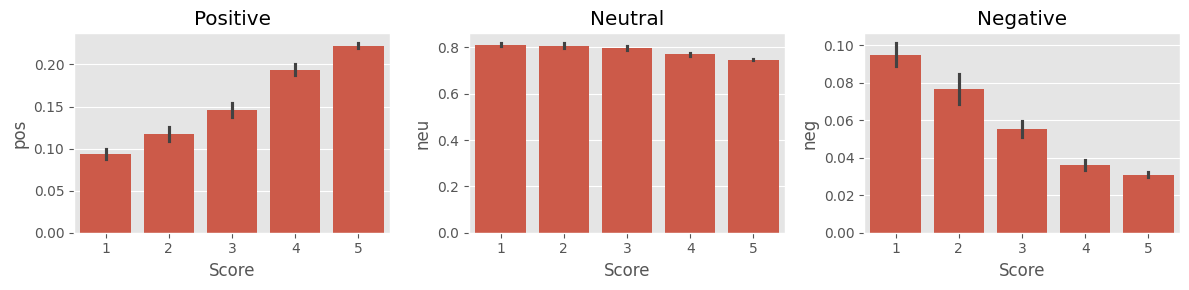

In [41]:
# Compare the VADER positive, negative and neutral results to the amazon star reviews score separately.
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


* Low ratings (1 and 2): Dominated by negative sentiment with some neutral elements.
* Mid-range ratings (3): Balanced between positive, neutral, and negative sentiment.
* High ratings (4 and 5): Strongly positive sentiment with minimal neutral or negative sentiment.

* Sentiment Validation: This breakdown could be used to validate customer review models where sentiment needs to align with star ratings.
* Review Analysis: Understanding the mix of sentiment in specific star categories can help companies identify areas of dissatisfaction or improvement.
* Anomaly Detection: Reviews with mismatched sentiment scores and star ratings (e.g., high positive sentiment in a 1-star review) can be flagged for further investigation.

### 2. RoBERTa Pretrained Model

* RoBERTa is different from VADER in that it considers the entire context of a word (both before and after it) to better understand its meaning.
* It is pretrained on large amount of unlabeled texts using masked language modeling. This means it masks random words in the input and trains the model to predict masked tokens based on the context. 

In [46]:
from transformers import AutoTokenizer # This converts the text into token IDs that the model can understand. 
from transformers import AutoModelForSequenceClassification, pipeline # pretrained model for sequence classification
from scipy.special import softmax # converts raw logits into probabilities.

In [51]:
# Specifying the model: This is a pretrained model specifically for sentiment analysis on twitter data.
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
# Load tokenizer and model from Hugging Face's transformers library

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL) # This is a pretrained model specific for sequence classification tasks


[{'label': 'LABEL_2', 'score': 0.9884945750236511}]


In [62]:
# Tokenize the Text column
inputs = tokenizer(data['Text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")

In [54]:
import nltk
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')

def clean_text(text):
    # Remove special characters and unnecessary spaces
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Clean the "Text" column
data['cleaned_text'] = data['Text'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14257\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [55]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,my cat loves these treats if ever i cant find ...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,a little less than i expected it tends to have...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",first there was frosted miniwheats in original...
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,and i want to congratulate the graphic artist ...
...,...,...,...,...,...,...,...,...,...,...,...
448203,448204,B001IA99FS,A14HK5I31UI1E4,Garjo,2,2,5,1244851200,Sweet & Tender,"This is a great tasting jerky. Thick, sweet an...",this is a great tasting jerky thick sweet and ...
356729,356730,B004U7QY5O,A1ARJ5J5KZU81D,Dev,1,1,5,1306108800,Tazo Zen Full leaf,Tazo Zen is a great tasting green tea. I woul...,tazo zen is a great tasting green tea i would ...
135038,135039,B004HOQE64,A1JZRY5ZGW15NS,Grits,0,0,5,1347321600,Best Blue Diamond Almonds,I am so delighted to get these Salt and vinega...,i am so delighted to get these salt and vinega...
69095,69096,B0018KR8V0,AAPQ4T87EJBKE,Jan2,0,0,5,1304985600,Great product!,Me and my husband love this bar. It is great f...,me and my husband love this bar it is great fo...


In [60]:
# Running the RoBERTa Pretrained Model on the text column of the data
results = []
for text in data['cleaned_text']:  # Iterating through each text in the column 
    result = classifier(text)[0]  # Get the first result (since it returns a list)
    results.append(result)

RuntimeError: The expanded size of the tensor (882) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 882].  Tensor sizes: [1, 514]

In [44]:
#### STEP 1: Text preprocessing : Using NLTK to clean and tokenize the texts

In [ ]:
### Step 2: Feature Extraction


In [ ]:
### Step 3: Modeling

In [21]:
# Check an example of the "Text" column
data("Text").value[0]


TypeError: 'DataFrame' object is not callable